# Ordenamiento

El ordenamiento de arreglos corresponde a encontrar una permutación tal que cada elemento sea menor a su sucesor. 

In [1]:
def selection_sort(collection):
    length = len(collection)
    for i in range(length):
        least = i
        for k in range(i + 1, length):
            if collection[k] < collection[least]:
                least = k
        collection[least], collection[i] = (collection[i], collection[least])
    return collection

def insertion_sort(collection):
    for index in range(1, len(collection)):
        while 0 < index and collection[index] < collection[index - 1]:
            collection[index], collection[index - 1] = collection[index - 1], collection[index]
            index -= 1
    return collection

In [2]:
insertion_sort([3,2,1])

[1, 2, 3]

In [3]:
import numpy as np
import time

def gen_random(size):
    return np.random.permutation(np.arange(size,dtype=np.int8))

def gen_worst_case(size):
    return np.arange(size,-1,-1,dtype=np.int8)

def gen_best_case(size):
    return np.arange(size,dtype=np.int8)

arr=gen_best_case(1000)

start=time.clock()
insertion_sort(arr.copy())
end=time.clock()
t1=end-start

start=time.clock()
selection_sort(arr.copy())
end=time.clock()
t2=end-start



print('Insertion Sort: %2f'%t1)
print('Selection Sort : %2f'%t2)


Insertion Sort: 0.165666
Selection Sort : 0.132967


In [4]:
def merge_sort(A):
    n=len(A)
    if len(A) <= 1:
      return A
    L = merge_sort(A[0:int(n/2)])
    R = merge_sort(A[int(n/2):n])
    return merge(L, R)

def merge(L, R):
    result = []
    l_idx, r_idx = (0, 0)
    while l_idx < len(L) and r_idx < len(R):
      if L[l_idx] < R[r_idx]:
        result.append(L[l_idx])
        l_idx += 1
      else:
        result.append(R[r_idx])
        r_idx += 1
    result.extend(L[l_idx:len(L)])
    result.extend(R[r_idx:len(R)])
    return result

In [5]:
arr=gen_best_case(10)

print(arr[0:int(10/2)])
print(arr[int(10/2):10])
#sorted_arr=merge_sort(arr)

#print(sorted_arr)

[0 1 2 3 4]
[5 6 7 8 9]


In [74]:
import pandas as pd
import time 
import sys

method=[merge_sort,selection_sort,insertion_sort]
fun=[gen_random,gen_worst_case,gen_best_case]
n_data=[1000,2000,3000,4000,5000,10000,20000]
n_samp=10

s_n=[]
ellapsed_time={m.__name__:[] for m in method}

for i in n_data:
    for j in range(n_samp):
        s_n.append(i)
        arr=gen_random(i)
        for m in method:
            start=time.clock()
            m(arr.copy())
            end=time.clock()
            ellapsed_time[m.__name__].append(end-start)
        

In [75]:
df_list=[]
for m in method:
    df=pd.DataFrame({'n':s_n,'time':ellapsed_time[m.__name__],'method':[m.__name__]*len(ellapsed_time[m.__name__])})
    df_list.append(df)
df=pd.concat(df_list,axis=0)
df.head()

,n,time,method
0,1000,0.008633,merge_sort
1,1000,0.004866,merge_sort
2,1000,0.004688,merge_sort
3,1000,0.004603,merge_sort
4,1000,0.004940,merge_sort


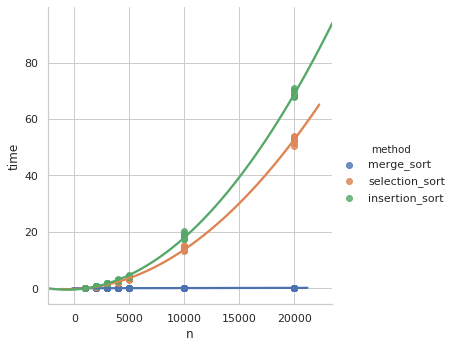

In [106]:
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

sns.lmplot(x="n", y="time", hue="method",order=2, data=df)
plt.show()

In [78]:
df.groupby(['method','n']).mean()


time
method         n               
insertion_sort 1000    0.176755
               2000    0.765445
               3000    1.680713
               4000    2.933166
               5000    4.220524
               10000  18.406501
               20000  68.914283
merge_sort     1000    0.005578
               2000    0.011750
               3000    0.017938
               4000    0.023516
               5000    0.028148
               10000   0.065620
               20000   0.128752
selection_sort 1000    0.141923
               2000    0.583661
               3000    1.285411
               4000    2.270363
               5000    3.283227
               10000  13.993897
               20000  52.826830

In [79]:
df.groupby(['method','n']).var()

time
method         n              
insertion_sort 1000   0.000145
               2000   0.002642
               3000   0.012037
               4000   0.023652
               5000   0.027008
               10000  0.878181
               20000  1.151831
merge_sort     1000   0.000002
               2000   0.000003
               3000   0.000008
               4000   0.000004
               5000   0.000001
               10000  0.000025
               20000  0.000051
selection_sort 1000   0.000112
               2000   0.001357
               3000   0.005010
               4000   0.027124
               5000   0.012698
               10000  0.569529
               20000  1.052165

In [148]:
from numpy.polynomial import polynomial as P

sort_data=df[df.method=='selection_sort'][['n','time']].to_numpy()
x = sort_data[:,0].flatten()
y = sort_data[:,1].flatten()

print("Selection Sort")
for i in np.arange(7):
    c, stats = P.polyfit(x,y,i,full=True)
    print("Grado : {0}, Residuos : {1:0.2f}".format(i,stats[0][0]))

Selection Sort
Grado : 0, Residuos : 22154.98
Grado : 1, Residuos : 1045.01
Grado : 2, Residuos : 16.91
Grado : 3, Residuos : 15.47
Grado : 4, Residuos : 15.14
Grado : 5, Residuos : 15.04
Grado : 6, Residuos : 15.01


In [147]:
sort_data=df[df.method=='insertion_sort'][['n','time']].to_numpy()
x = sort_data[:,0].flatten()
y = sort_data[:,1].flatten()

print("Insertion Sort")
for i in np.arange(7):
    c, stats = P.polyfit(x,y,i,full=True)
    print("Grado : {0}, Residuos : {1:0.2f}".format(i,stats[0][0]))

Insertion Sort
Grado : 0, Residuos : 37728.79
Grado : 1, Residuos : 1751.34
Grado : 2, Residuos : 23.76
Grado : 3, Residuos : 19.99
Grado : 4, Residuos : 19.10
Grado : 5, Residuos : 18.89
Grado : 6, Residuos : 18.86


In [146]:
sort_data=df[df.method=='merge_sort'][['n','time']].to_numpy()
x = sort_data[:,0].flatten()
y = sort_data[:,1].flatten()

print("Merge Sort")
for i in np.arange(7):
    c, stats = P.polyfit(x,y,i,full=True)
    print("Grado : {0}, Residuos : {1:0.2f}".format(i,stats[0][0]))

Merge Sort
Grado : 0, Residuos : 0.11
Grado : 1, Residuos : 0.00
Grado : 2, Residuos : 0.00
Grado : 3, Residuos : 0.00
Grado : 4, Residuos : 0.00
Grado : 5, Residuos : 0.00
Grado : 6, Residuos : 0.00


In [155]:
np.random.seed(123)
from numpy.polynomial import polynomial as P
x = np.linspace(1,10,51)
y = x*np.log(x)+np.random.normal(51)
for i in np.arange(7):
    c, stats = P.polyfit(x,y,i,full=True)
    print("Grado : {0}, Residuos : {1:0.2f}".format(i,stats[0][0]))

Grado : 0, Residuos : 2480.77
Grado : 1, Residuos : 22.01
Grado : 2, Residuos : 0.65
Grado : 3, Residuos : 0.04
Grado : 4, Residuos : 0.00
Grado : 5, Residuos : 0.00
Grado : 6, Residuos : 0.00


In [153]:
np.random.seed(123)
from numpy.polynomial import polynomial as P
x = np.linspace(1,10,51)
y = x**2+np.random.normal(51)
for i in np.arange(7):
    c, stats = P.polyfit(x,y,i,full=True)
    print("Grado : {0}, Residuos : {1:0.2f}".format(i,stats[0][0]))

Grado : 0, Residuos : 45328.74
Grado : 1, Residuos : 2008.32
Grado : 2, Residuos : 0.00
Grado : 3, Residuos : 0.00
Grado : 4, Residuos : 0.00
Grado : 5, Residuos : 0.00
Grado : 6, Residuos : 0.00
